In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
proc_df = pd.read_csv('./Data/CSVs/proc.csv', header=None)
proc_df.head()

In [ ]:
flows_df = pd.read_csv('./Data/Csvs/flows.csv', header=None)
flows_df.head()

In [2]:
# import the red team data
redteam_df = pd.read_csv('./Data/CSVs/redteam.csv', header=None)
redteam_df.head()

,0,1,2,3
0,150885,U620@DOM1,C17693,C1003
1,151036,U748@DOM1,C17693,C305
2,151648,U748@DOM1,C17693,C728
3,151993,U6115@DOM1,C17693,C1173
4,153792,U636@DOM1,C17693,C294


In [3]:
# import the dns lookup event data

dns_df = pd.read_csv('./Data/CSVs/dns.csv', header=None)
dns_df.head()

,0,1,2
0,2,C4653,C5030
1,2,C5782,C16712
2,6,C1191,C419
3,15,C3380,C22841
4,18,C2436,C5030


In [4]:
# rename the columns in redteam
redteam_df.columns = ["Time", "User_Domain", "Source_Computer", "Destination_Computer"]
redteam_df.head()

,Time,User_Domain,Source_Computer,Destination_Computer
0,150885,U620@DOM1,C17693,C1003
1,151036,U748@DOM1,C17693,C305
2,151648,U748@DOM1,C17693,C728
3,151993,U6115@DOM1,C17693,C1173
4,153792,U636@DOM1,C17693,C294


In [6]:
# rename the columns in DNS lookup
dns_df.columns = ["Time", "Source_Computer_DNS", "Computer_Resolved"]
dns_df.head()

,Time,Source_Computer_DNS,Computer_Resolved
0,2,C4653,C5030
1,2,C5782,C16712
2,6,C1191,C419
3,15,C3380,C22841
4,18,C2436,C5030


In [26]:
# merge the redteam and dns dataframes to determine what is happening when there are attacks
redteam_dns = redteam_df.merge(dns_df, on='Time')
redteam_dns.head()

,Time,User_Domain,Source_Computer,Destination_Computer,Source_Computer_DNS,Computer_Resolved
0,151993,U6115@DOM1,C17693,C1173,C14818,C5136
1,151993,U6115@DOM1,C17693,C1173,C3380,C22841
2,155219,U748@DOM1,C17693,C5693,C14907,C5030
3,155591,U748@DOM1,C17693,C332,C2749,C1685
4,155591,U748@DOM1,C17693,C332,C421,C457


In [27]:
redteam_dns.shape

(1484, 6)

In [25]:
redteam_dns.Source_Computer.value_counts()

C17693    1586
C19932     170
C22409      41
C18025       4
Name: Source_Computer, dtype: int64

In [15]:
dns_call_attack = 0
for index, row in redteam_dns.iterrows():
    if row["Destination_Computer"] == row["Source_Computer_DNS"]:
        dns_call_attack +=1

print(dns_call_attack)

0


In [17]:
redteam_df.shape

(749, 4)

In [18]:
dns_df.shape

(40821591, 3)

In [68]:
redteam_group = redteam_dns.groupby(['Time']).count().sort_values(by=['Source_Computer_DNS'], ascending=False)
dns_count = redteam_dns.Computer_Resolved.value_counts()


#plt.scatter(time, dns_count)
redteam_group.head()

,User_Domain,Source_Computer,Destination_Computer,Source_Computer_DNS,Computer_Resolved
Time,,,,,
2461523,36,36,36,36,36
2383984,31,31,31,31,31
2303227,30,30,30,30,30
2364275,28,28,28,28,28
2536079,27,27,27,27,27


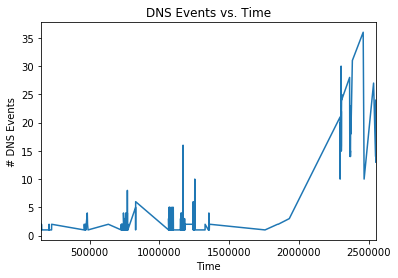

In [41]:
# plot the count of number of events vs. time points
redteam_group['Source_Computer_DNS'].plot()
plt.xlabel("Time")
plt.ylabel("# DNS Events")
plt.title("DNS Events vs. Time")
plt.show()

In [66]:
redteam_user_group = redteam_dns.groupby(["User_Domain"]).nunique().sort_values(by=['Source_Computer_DNS'], ascending=False)
redteam_user_group.head()

,Time,User_Domain,Source_Computer,Destination_Computer,Source_Computer_DNS,Computer_Resolved
User_Domain,,,,,,
U737@DOM1,25,1,2,16,182,38
U66@DOM1,80,1,1,57,152,50
U3005@DOM1,24,1,1,18,127,37
U5087@DOM1,7,1,1,4,56,23
U4978@DOM1,4,1,1,2,43,18


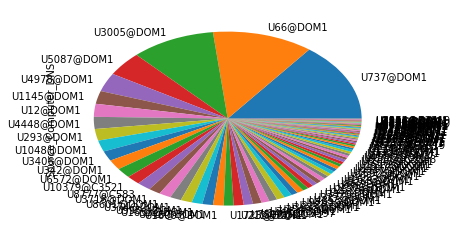

In [69]:
redteam_user_group['Source_Computer_DNS'].plot(kind='pie')
plt.show()

In [42]:
# maximum number of events detected at one time point
redteam_group['Source_Computer_DNS'].max()

36

In [56]:
redteam_source = redteam_dns.groupby(['Source_Computer']).count()
redteam_source.shape

(4, 5)

In [58]:
redteam_user = redteam_dns.groupby(['User_Domain']).count()
redteam_user.shape

(88, 5)